<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calculate-the-height-of-a-beam" data-toc-modified-id="Calculate-the-height-of-a-beam-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculate the height of a beam</a></span></li><li><span><a href="#Visualize-scan-strategy" data-toc-modified-id="Visualize-scan-strategy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize scan strategy</a></span></li></ul></div>

In [54]:
# Import libraries

import pandas as pd
import numpy as np
from IPython import display
import os
import glob
import time

import gspread
from oauth2client.service_account import ServiceAccountCredentials
#$from df2gspread import df2gspread as d2g

from osgeo import gdal, ogr
from shapely.geometry import LineString
from shapely import wkt

from math import pi, sqrt, radians, sin
import math


%matplotlib inline
import matplotlib.pyplot as plt

In [55]:
 beams=[0.50, 1.0, 1.60, 2.60, 3.60, 4.70, 5.90, 7.40, 9.00, 11.0, 15.0, 22.0, 32.0, 45.0]

# Calculate the height of a beam

In [56]:
EarthRadius = 6374

In [57]:
def calcHeight(angle=0,range=10):
    R=6374 # Earth radius
    Ri=4.0/3*R
    angle_rad = radians(angle)
    return(sqrt(pow(range,2)+pow(Ri,2)+2*range*Ri*sin(angle_rad))-Ri)

In [58]:
def calcAngle(range=10,height=0):
    R=6374 # Earth radius
    Ri=4.0/3*R
    return(asin((pow((Ri+height),2)-pow(range,2)-pow(Ri,2))/(2*range*Ri))*180.0/pi)

In [88]:
calcHeight(0.5,70) 

0.8990904412148666

# Visualize scan strategy

(0.0, 20.0)

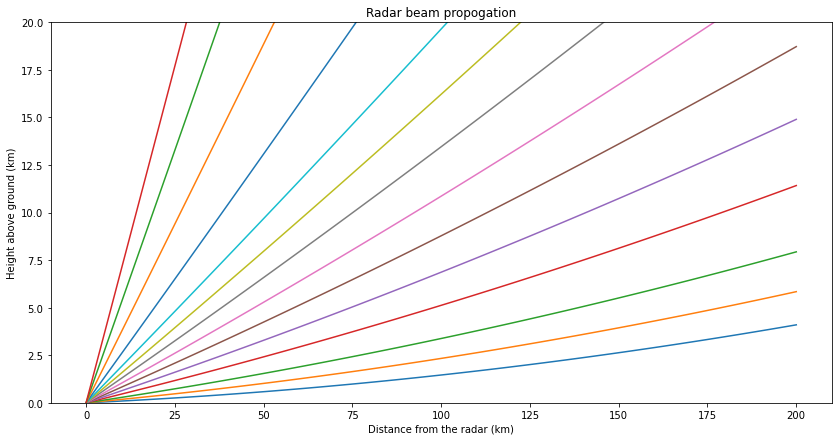

In [39]:
fig = plt.figure(figsize=[14,7])
ax = plt.axes()

for b in beams:
    x = np.linspace(0, 200, 100)
    y = [calcHeight(b,i) for i in x]
    ax.plot(x,y)

plt.title("Radar beam propogation")
plt.xlabel("Distance from the radar (km)")
plt.ylabel("Height above ground (km)");

plt.ylim([0,20])
#plt.savefig('beam.png', dpi=300)